# Pymaceuticals Inc.
---

### Analysis

- Following are some key observations that can be inferred based on the data analysis:
• The tumor volume data of both Capomulin and Ramicane also had the lowest standard deviation, variance, and standard error compared to tumor volumes of mice treated with other drugs. The average tumor volume for mice treated with Capomulin (40.676 mm3) and Ramicane (40.217 mm3) was lowest as compared to the average tumor volume of treatments with other drugs (ranging between 52.321 mm3 and 55.236 mm3).
• The boxplot shows a relatively lower average tumor volume for mice treated with Capomulin and Ramicane, indicating that these two drug regimens were the most effective in reducing the tumor size by the end of the treatment period.
• The correlation coefficient of 0.84 indicates a strong positive correlation,  implying that the mice with greater weight tend to show a weaker response to drugs tested as they have tumors with more significant volumes. The scatter plot and regression line indicate a linear relationship between the average tumor volume and average weight of the mice treated with Capomulin.
• Overall, all the different analyses show consistent findings and indicate Capomulin and Ramicane to be the most effective drug regimens. Out of the four top drugs analyzed, only Infubinol has one outlier, which affirms the reliability of the data.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate mice based on Mouse ID and Timepoint:")
print(duplicate_mice['Mouse ID'].unique())


Duplicate mice based on Mouse ID and Timepoint:
['g989']


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]

In [29]:
# Checking the number of mice in the cleaned DataFrame.
num_cleaned_mice = cleaned_data["Mouse ID"].nunique()
print(f"Number of mice in the cleaned DataFrame: {num_cleaned_mice}")

Number of mice in the cleaned DataFrame: 248


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the properties for each drug regimen
summary_statistics_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns in the summary statistics DataFrame
summary_statistics_df = summary_statistics_df.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
summary_statistics_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean",
    "median",
    "var",
    "std",
    "sem"]
)

# Display the summary statistics DataFrame
summary_statistics_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

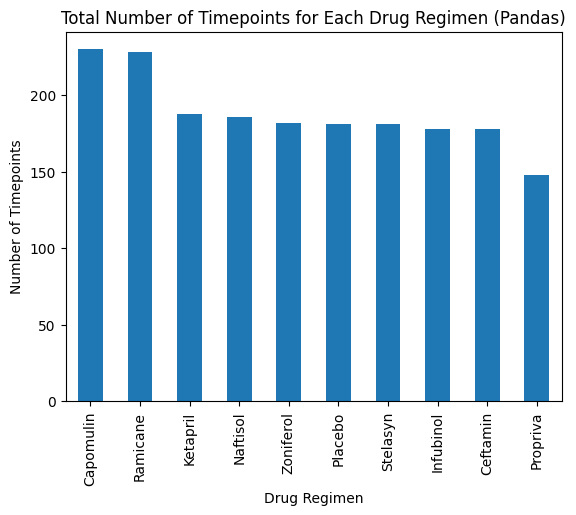

In [40]:
# Group the data by Drug Regimen and count the number of rows in each group
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas DataFrame.plot() method
drug_regimen_counts.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Timepoints",
                         title="Total Number of Timepoints for Each Drug Regimen (Pandas)")

# Show the plot
plt.show()


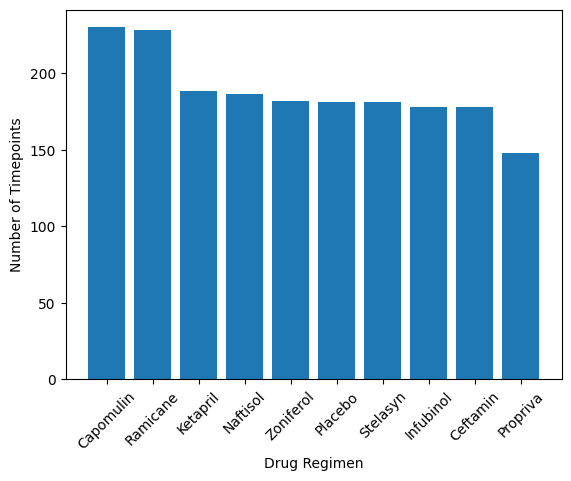

In [41]:
import matplotlib.pyplot as plt

# Group the data by Drug Regimen and count the number of rows in each group
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Matplotlib's pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=45)

# Show the plot
plt.show()


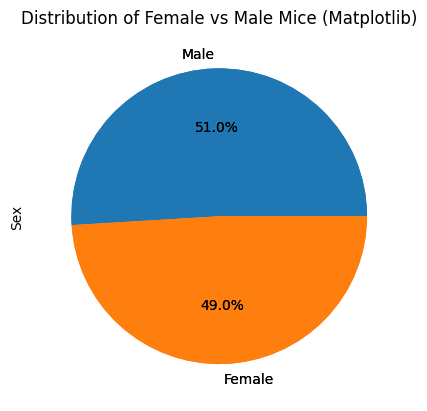

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Pie chart using Pandas DataFrame.plot() method
gender_distribution = cleaned_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Female vs Male Mice (Pandas)")

# Pie chart using Matplotlib's pyplot methods
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice (Matplotlib)")
plt.show()

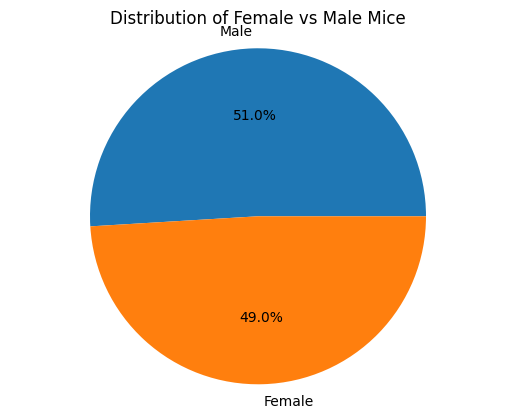

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of female and male mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge the last_timepoint_df with the original cleaned_data DataFrame
final_tumor_volume_df = pd.merge(last_timepoint_df, cleaned_data, on=["Mouse ID", "Timepoint"])

# Filter the DataFrame to include only the four treatment regimens
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(treatment_regimens)]

# Display the DataFrame with the final tumor volume for each mouse in the four treatment regimens
final_tumor_volume_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset of tumor volume data to the list
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Print the potential outliers
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Potential outliers for {treatment}: {list(potential_outliers)}")


Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


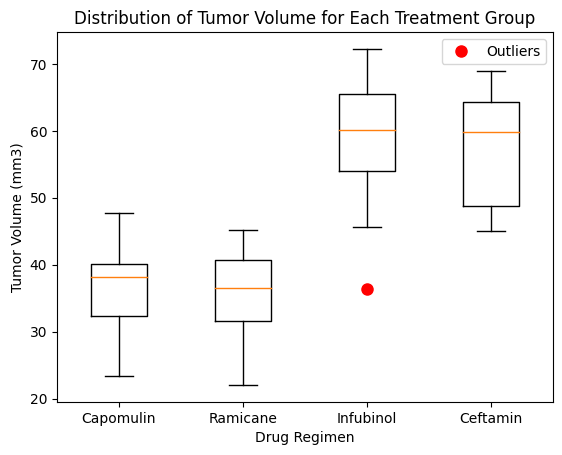

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Generate a box plot for each treatment group
plt.boxplot(tumor_volume_data, labels=treatment_regimens)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Identify and mark the outliers
for i, treatment in enumerate(treatment_regimens):
    tumor_volume = tumor_volume_data[i]
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify the outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Mark the outliers with red color
    plt.plot([i + 1] * len(outliers), outliers, 'ro', markersize=8, label="Outliers" if i == 0 else "")

# Show the plot
plt.legend()
plt.show()


## Line and Scatter Plots

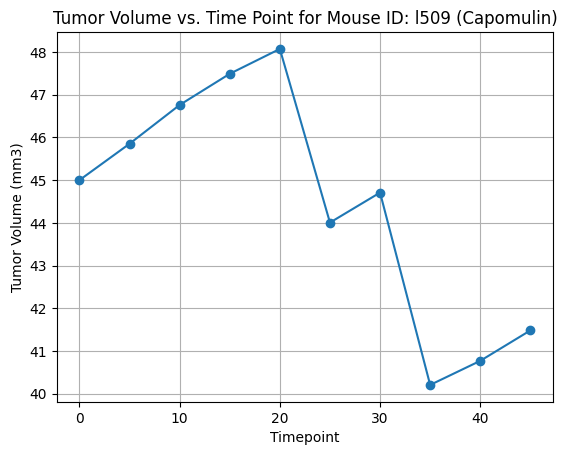

In [53]:

# Choose a single mouse treated with Capomulin
mouse_id = "l509"
single_mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Filter the data for Capomulin treatment
capomulin_data = single_mouse_data[single_mouse_data["Drug Regimen"] == "Capomulin"]

# Create a line plot for tumor volume vs. time point
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)")

# Show the plot
plt.grid(True)
plt.show()


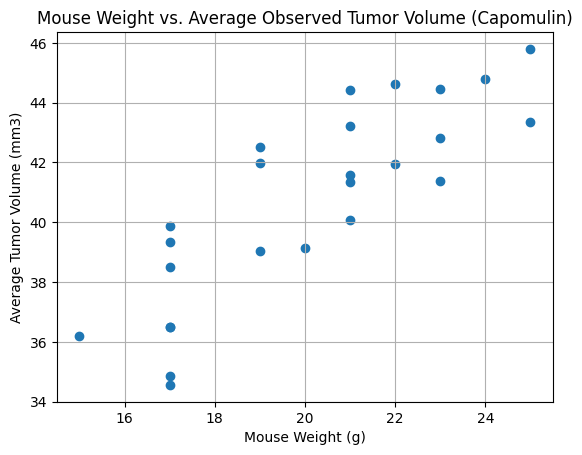

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin treatment
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse metadata to get the mouse weight
capomulin_average_volume_df = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")

# Create a scatter plot for mouse weight vs. the average observed tumor volume
plt.scatter(capomulin_average_volume_df["Weight (g)"], capomulin_average_volume_df["Tumor Volume (mm3)"])

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


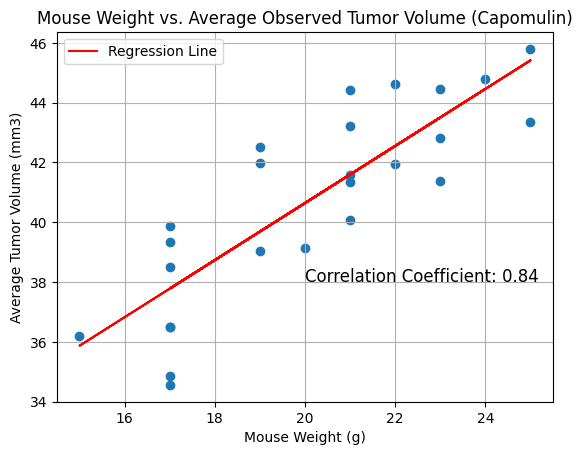

In [56]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the data for Capomulin treatment
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse metadata to get the mouse weight
capomulin_average_volume_df = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = st.pearsonr(capomulin_average_volume_df["Weight (g)"], capomulin_average_volume_df["Tumor Volume (mm3)"])[0]

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_average_volume_df["Weight (g)"], capomulin_average_volume_df["Tumor Volume (mm3)"])

# Create a scatter plot for mouse weight vs. the average observed tumor volume
plt.scatter(capomulin_average_volume_df["Weight (g)"], capomulin_average_volume_df["Tumor Volume (mm3)"])

# Add the linear regression line to the plot
plt.plot(capomulin_average_volume_df["Weight (g)"], slope * capomulin_average_volume_df["Weight (g)"] + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")

# Add the correlation coefficient to the plot
plt.text(20, 38, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12)

# Show the plot with the linear regression line and correlation coefficient
plt.grid(True)
plt.legend()
plt.show()
